### Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

### Sehwag

In [3]:
sehwag = pd.read_csv("sehwag.csv")

In [42]:
print("total matches: ", len(sehwag))

total matches:  245


In [5]:
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731


## Population mean, and population std

In [8]:
mean = round(sehwag["Runs"].mean(), 2)
print("Mean: ", mean)

Mean:  33.77


In [10]:
std = round(sehwag["Runs"].std(), 2)
print("STD: ", std)

STD:  34.81


In [48]:
num_samples = 150

sample = sehwag["Runs"].sample(num_samples)

print("Sample mean: ", round(sample.mean(), 2))
print("Sample std: ", round(sample.std(), 2))

Sample mean:  34.89
Sample std:  34.83


In [115]:
num_people = 1000

num_samples = 5

means = []
stds = []

for i in range(num_people):
    sample = sehwag["Runs"].sample(num_samples)

    means.append(round(sample.mean(), 2))
    stds.append(round(sample.std(), 2))

<AxesSubplot:ylabel='Count'>

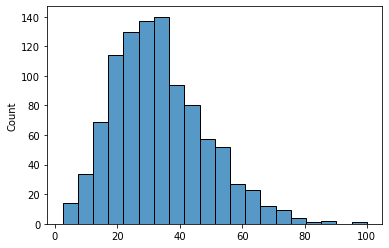

In [116]:
sns.histplot(means, bins = 20)

<AxesSubplot:ylabel='Count'>

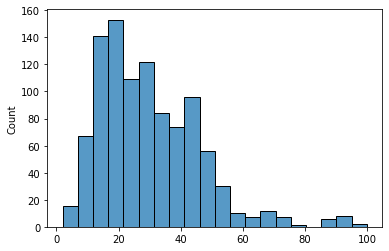

In [117]:
sns.histplot(stds, bins = 20)

## Sample mean trend
  1. as `n` - sample size increases, we expect lesser variance.
  2. If `n` increases a lot, then the sample mean is very close to the actual mean.

Text(0, 0.5, 'Sample mean')

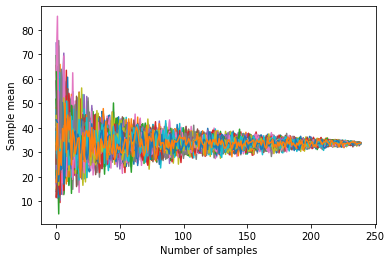

In [77]:
sample_mean_trend = []
for person in range(62):
    for num_samples in range(5, len(sehwag)):
        sample = sehwag["Runs"].sample(num_samples)

        sample_mean = round(sample.mean(), 2)
        sample_std  = round(sample.std(), 2)
        
        sample_mean_trend.append(sample_mean)
    plt.plot(sample_mean_trend)
    sample_mean_trend = []
plt.xlabel("Number of samples")
plt.ylabel("Sample mean")

In [78]:
from scipy.stats import norm
print(norm.cdf(2) - norm.cdf(-2))

0.9544997361036416


In [83]:
print(round(norm.ppf(0.025), 2))

-1.96


In [82]:
print(round(norm.ppf(0.975), 2))

1.96


In [87]:
survey_1 = [35, 36, 33, 37, 34, 35]
np.mean(survey_1)

survey_2 = [20, 37, 17, 50, 53, 33]
np.mean(survey_2)

n = len(survey_1)

In [88]:
np.random.choice(["H", "T"], size = 5)

array(['T', 'H', 'T', 'H', 'T'], dtype='<U1')

In [89]:
bootstrapped_samples = np.random.choice(survey_1, size=n)
print(bootstrapped_samples)
np.mean(bootstrapped_samples)

[34 33 37 34 35 36]


34.833333333333336

In [91]:
list_of_means = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(survey_1, size=n)
    list_of_means.append(np.mean(bootstrapped_samples))

<AxesSubplot:ylabel='Count'>

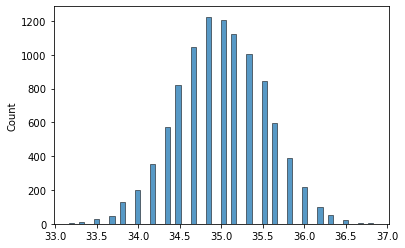

In [92]:
sns.histplot(list_of_means)

In [94]:
## Survey_1
left = np.percentile(list_of_means, 2.5)
right = np.percentile(list_of_means, 97.5)

print("Confidence interval: ", [left, right])

Confidence interval:  [34.0, 36.0]


In [95]:
survey_1 = [20, 37, 17, 50, 53, 33]
np.mean(survey_1)

n = len(survey_1)

In [96]:
list_of_means = []
for i in range(10000):
    bootstrapped_samples = np.random.choice(survey_1, size=n)
    list_of_means.append(np.mean(bootstrapped_samples))

<AxesSubplot:ylabel='Count'>

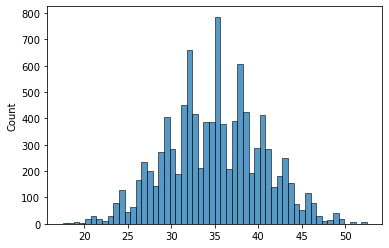

In [97]:
sns.histplot(list_of_means)

In [98]:
## Survey_2
left = np.percentile(list_of_means, 2.5)
right = np.percentile(list_of_means, 97.5)

print("Confidence interval: ", [left, right])

Confidence interval:  [24.0, 46.0]
